In [1]:
import random
import numpy as np
from scipy.spatial import distance
import pandas as pd


def give_me_vector(dim):
    return np.random.randint(100, size=dim)/100

def give_me_10points(dim):
    dataset = []
    for i in range(10):
        dataset.append(give_me_vector(dim))
    return dataset

def cal_average_pair_distance(dataset):
    distances = []
    for item1 in dataset:
        for item2 in dataset:
            distances.append(distance.euclidean(item1, item2))
    return distances        

def Average(lst): 
    return sum(lst) / len(lst) 

In [11]:
results = []
for dim1 in range(1,10000):
    data1 = give_me_10points(dim1)
    data1_distancearr = cal_average_pair_distance(data1)
    data1_distancearr_avg = Average(data1_distancearr)
    base0 = [0]*dim1
    base1 = [1]*dim1
    maxd = distance.euclidean(base0,base1)
    v_min = min([x for x in data1_distancearr if x>0])
    v_max = max([x for x in data1_distancearr if x>0])
    v_min = min(v_min,data1_distancearr_avg)
    
    results.append( (dim1, data1_distancearr_avg,maxd,v_min,v_max))
    
results_df = pd.DataFrame(results,columns=["dim","average_distance","maxd","vmin","vmax"])    

In [12]:
results_df

,dim,average_distance,maxd,vmin,vmax
0,1,0.226400,1.000000,0.010000,0.530000
1,2,0.435978,1.414214,0.028284,0.800812
2,3,0.672571,1.732051,0.160624,1.406343
3,4,0.702655,2.000000,0.362905,1.238951
4,5,0.866943,2.236068,0.489081,1.373827
5,6,0.881614,2.449490,0.430349,1.445407
6,7,0.892097,2.645751,0.555338,1.485799
7,8,0.970530,2.828427,0.664906,1.670150
8,9,1.138305,3.000000,0.633798,1.822471
9,10,1.217168,3.162278,0.836959,2.083675


Text(0, 0.5, 'L2 distance')

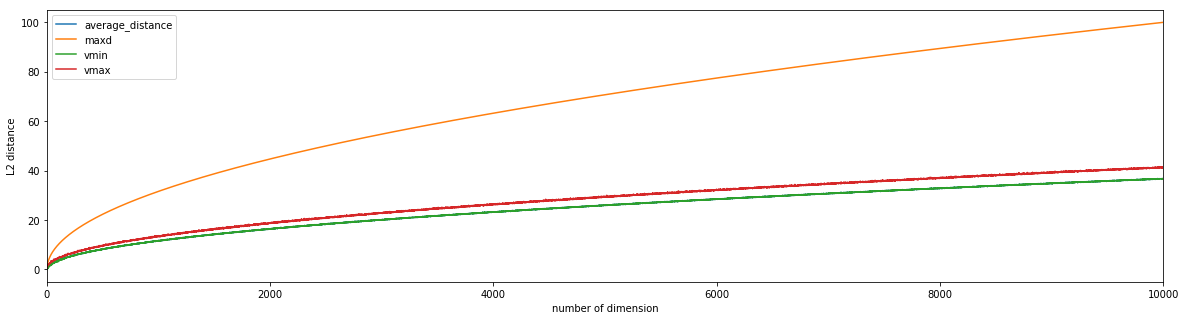

In [13]:
%matplotlib inline
ax1 = results_df.set_index("dim").plot(figsize=(20,5))
ax1.set_xlabel("number of dimension")
ax1.set_ylabel("L2 distance")

Text(0, 0.5, 'Distance in ratio(L2 distance/Max)')

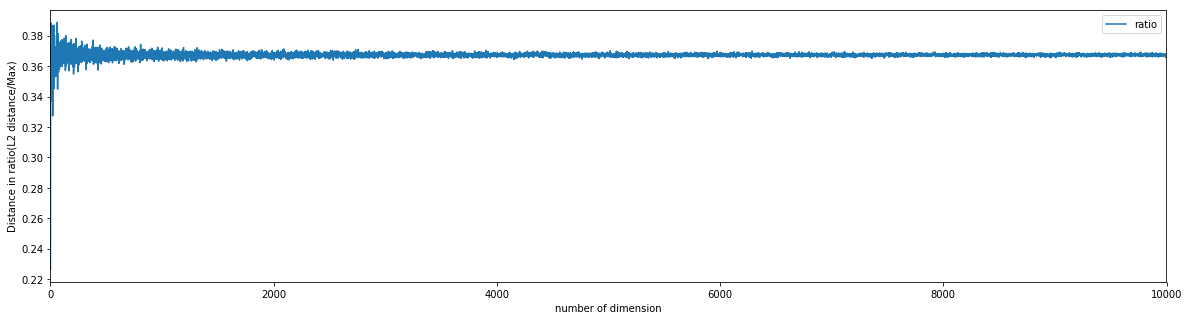

In [14]:
results_df["ratio"] = results_df.apply(lambda x:x["average_distance"]/x["maxd"],axis=1)
ax1 = results_df.set_index("dim").loc[:,["ratio"]].plot(figsize=(20,5))
ax1.set_xlabel("number of dimension")
ax1.set_ylabel("Distance in ratio(L2 distance/Max)")

Text(0, 0.5, 'min_max_ratio')

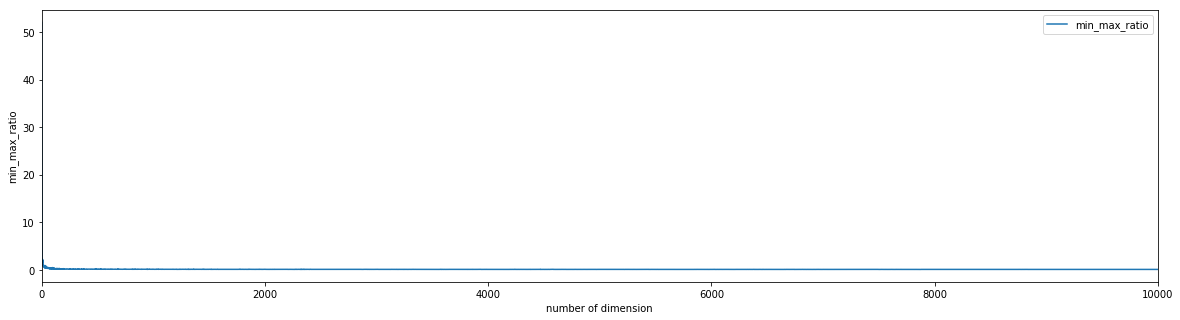

In [15]:
results_df["min_max_ratio"] = results_df.apply(lambda x:(x["vmax"]-x["vmin"])/(x["vmin"]),axis=1)
ax1 = results_df.set_index("dim").loc[:,["min_max_ratio"]].plot(figsize=(20,5))
ax1.set_xlabel("number of dimension")
ax1.set_ylabel("min_max_ratio")

/Users/spark_tsao/miniconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  


(0.03782526317604728, 1)

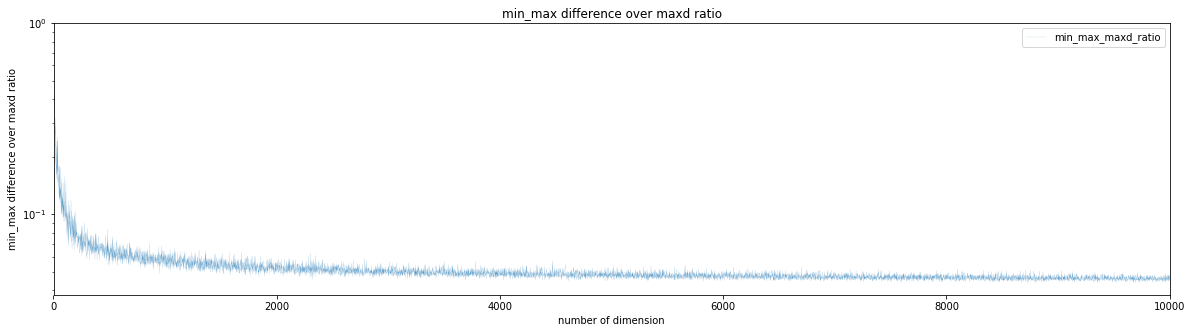

In [22]:
results_df["min_max_maxd_ratio"] = results_df.apply(lambda x:(x["vmax"]-x["vmin"])/(x["maxd"]),axis=1)
ax1 = results_df.set_index("dim").loc[:,["min_max_maxd_ratio"]].plot(figsize=(20,5),logy=True,linewidth=0.1)
ax1.set_xlabel("number of dimension")
ax1.set_ylabel("min_max difference over maxd ratio")
ax1.set_title("min_max difference over maxd ratio")
ax1.set_ylim(0,1)

In [17]:
results_df[:10]

,dim,average_distance,maxd,vmin,vmax,ratio,min_max_ratio,min_max_maxd_ratio
0,1,0.226400,1.000000,0.010000,0.530000,0.226400,52.000000,0.520000
1,2,0.435978,1.414214,0.028284,0.800812,0.308283,27.312983,0.546260
2,3,0.672571,1.732051,0.160624,1.406343,0.388309,7.755508,0.719216
3,4,0.702655,2.000000,0.362905,1.238951,0.351327,2.413983,0.438023
4,5,0.866943,2.236068,0.489081,1.373827,0.387709,1.808998,0.395670
5,6,0.881614,2.449490,0.430349,1.445407,0.359917,2.358687,0.414396
6,7,0.892097,2.645751,0.555338,1.485799,0.337181,1.675488,0.351681
7,8,0.970530,2.828427,0.664906,1.670150,0.343134,1.511858,0.355407
8,9,1.138305,3.000000,0.633798,1.822471,0.379435,1.875476,0.396224
9,10,1.217168,3.162278,0.836959,2.083675,0.384902,1.489579,0.394246


In [18]:
results_df[-10:]

,dim,average_distance,maxd,vmin,vmax,ratio,min_max_ratio,min_max_maxd_ratio
9989,9990,36.560210,99.949987,36.560210,41.107224,0.365785,0.124371,0.045493
9990,9991,36.750528,99.954990,36.750528,41.496994,0.367671,0.129154,0.047486
9991,9992,36.659988,99.959992,36.659988,41.205270,0.366747,0.123985,0.045471
9992,9993,36.767859,99.964994,36.767859,41.239085,0.367807,0.121607,0.044728
9993,9994,36.718065,99.969995,36.718065,41.268945,0.367291,0.123941,0.045522
9994,9995,36.685037,99.974997,36.685037,41.488362,0.366942,0.130934,0.048045
9995,9996,36.728382,99.979998,36.728382,41.223364,0.367357,0.122384,0.044959
9996,9997,36.710305,99.984999,36.710305,41.278640,0.367158,0.124443,0.045690
9997,9998,36.792791,99.989999,36.792791,41.549442,0.367965,0.129282,0.047571
9998,9999,36.690961,99.995000,36.690961,41.276934,0.366928,0.124989,0.045862
